# Import package and data

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!pip install gdown

!gdown --id "1XEsMoAKUg10YkYI-VYmVCWhyzVpwwJnI"
# https://drive.google.com/file/d/1XEsMoAKUg10YkYI-VYmVCWhyzVpwwJnI/view?usp=sharing
# !gdown --id "1BfpxvsjCe00lMLdk-9shLF7ZwrdzhbCG"
# !gdown --id "1DbElvm2Ir27vd2OY98M01AOysq9iLIjb"
# !gdown --id "1_Y_rS5YeneItKi6Xa-WkLDgp7xpY7Z0P"
# !gdown --id "1d0JXRo-7oYQ0r33qNQ4wIV6WR0FcU5De"

Downloading...
From: https://drive.google.com/uc?id=1XEsMoAKUg10YkYI-VYmVCWhyzVpwwJnI
To: /content/listings_summary.csv
100% 73.5M/73.5M [00:01<00:00, 73.4MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('listings_summary.csv')
pd.set_option('display.max_rows', 30)
df.shape

(22552, 96)

In [ ]:
df_des = df[df['description'].notnull()]
df_des = df_des[["id", "description"]]
df_des.shape

(22349, 2)

In [ ]:
df_des['description'][0]

'Great location!  30 of 75 sq meters. This wood floored/high ceiling typical Berlin "Altbau" section of an apartment consists of 1 simple large room, a small kitchen and a bathroom + shower. The apartment is in Mitte, close to Prenzlauer Berg/Mauerpark. Perfect for short visits, singles or couples. Your section is closed from the rest of the bigger flat wich is not noticeable. You will not be sharing your space. A+++ location! This „Einliegerwohnung“ is an extention of a larger apartment with a separate entrance, bathroom and kitchen. The door to the rest of the apartment is soundproof, hidden, locked and barely noticable (behind mirror in pictures). Your 30 sq meters are facing a quiet courtyard. This wood floored/high ceiling typical Berlin "Altbau" apartment consists of 1 large room with a large double bed, optionally with an extra matress for a 3rd guest), a small kitchen suitable for preparing simple meals, a bathroom + shower + bathtub and of course your own entrance (all linens 

# Translation

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
import time

translator = Translator()

def trans(text):
  try:
    lang = translator.detect(text).lang
  except:
    lang = "en"

  if lang != "en":
    try:
      text = translator.translate(text, dest='en').text
      time.sleep(1)
    except:
      pass
  
  return text

In [ ]:
df_des["description"] = df_des["description"].apply(trans)

# Tokenize(nltk) 

In [ ]:
!pip install nltk

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def lower_remove_whitespace(text):
    try:
        return  " ".join(text.lower().split())
    except:
        return ""

In [ ]:
df_des["description"] = df_des["description"].apply(lambda X: lower_remove_whitespace(X))

In [ ]:
# 斷詞
def tokenize_func(text):
    try:
        return word_tokenize(text)
    except:
        return ""

In [ ]:
df_des["description_token"] = df_des["description"].apply(tokenize_func)

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos = tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

In [ ]:
df_des["description_token"] = df_des["description_token"].apply(lemmatization)

In [ ]:
df_des.head()

# Token(one word & two word)

In [ ]:
'''移除stopwords和標點符號'''
stopword_list_eng = stopwords.words('english')
text_list = df_des['description'].tolist()
tokens_list = []
clean_tokens = []

for text in text_list:
    try:
        tokens_list.append(word_tokenize(text))
    except:
        pass

for lst in tokens_list:
    for tok in lst:
        if tok.lower() not in stopword_list_eng and tok.isalpha():
            clean_tokens.append(tok)

In [ ]:
len(clean_tokens)
# 1383772

In [ ]:
from collections import Counter

word_count = Counter(clean_tokens)
frequent_words = word_count.most_common(200)

frequent_words[:10]

[('und', 26331),
 ('room', 21562),
 ('apartment', 19834),
 ('berlin', 18357),
 ('die', 14429),
 ('kitchen', 13673),
 ('der', 12887),
 ('mit', 12619),
 ('ist', 12430),
 ('flat', 10933)]

In [ ]:
'''不移除stopwords, 只移除標點符號的pairs'''
tokens_no_punc = []
for lst in tokens_list:
    word_list = []
    for tok in lst:
        if tok.isalpha():
            word_list.append(tok)
    tokens_no_punc.append(word_list)

In [ ]:
'''移除stopwords後的pairs'''
word_pair_counts = Counter()

clean_tokens_pair = []
for tokens in tokens_no_punc:
    for i in range(len(tokens)-1):
        (w1, w2) = (tokens[i], tokens[i+1])
        if w1.lower() not in stopword_list_eng and w2.lower() not in stopword_list_eng:
            word_pair_counts[(w1, w2)] += 1
            clean_tokens_pair.append(str(w1)+" "+str(w2))

common_pairs = word_pair_counts.most_common(100)

In [ ]:
len(clean_tokens_pair)
# 670868

1056577

In [ ]:
'''出現次數超過200次的詞'''
features_list = clean_tokens + clean_tokens_pair
clean_tokens_pair_200 = [n for n in word_pair_counts.elements() if word_pair_counts[n]>200]
clean_tokens_pair_200 = [clean_tokens_pair_200[i][0] + " " + clean_tokens_pair_200[i][1] for i in range(len(clean_tokens_pair_200))]
clean_tokens_200 = [n.lower() for n in word_count.elements() if word_count[n]>200]
features_list_200 = list(set(clean_tokens_200)) + list(set(clean_tokens_pair_200))

In [ ]:
len(features_list_200)  # 1151個要轉成dummy的詞

# Dummy

In [ ]:
for n in features_list_200:
    df_des_dummy[n] = 0

for index, row in df_des.iterrows():
    word = row['description_token']
    for w in features_list_200:
        try:
            if str(w) in word:
                df_des_dummy.at[index, str(w)] = 1
        except:
            continue

# PCA on dummy

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

data_col = df_des_dummy.drop(columns=["id", "description", "description_token"])

In [ ]:
'''n_components=8'''
pca = PCA(n_components=8)
pca.fit(data_col)
data_pca = pca.transform(data_col)

In [ ]:
data_pca_df = pd.DataFrame(data_pca)
data_pca_df.columns =  ["des_pc"+str(x) for x in range(8)] 
data_pca_df.shape

(22349, 8)

In [ ]:
df_out = pd.concat([df_des, data_pca_df], axis=1)
df_out.head()

# Sentiment analysis (Afinn)

In [ ]:
!pip install afinn
from afinn import Afinn

     |████████████████████████████████| 52 kB 894 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=a40d3b581ed3685862babab994a095bb43673abca62025758eb16e51783d777f
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
'''看看afinn裡面是怎麼評分的'''
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(10, random_state = seed)

,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


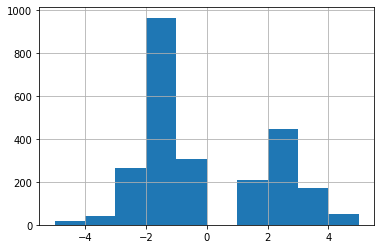

In [ ]:
'''看一下afinn裡面正面、負面字的分布和給分'''
afinn_wl_df['value'].hist()  # 負面的字比較多，且 +2 和 -2 這兩種分數最多

In [ ]:
afinn = Afinn(language='en')
afinn_score = []

for text in df_des["description"]:
  score = afinn.score(text)
  afinn_score.append(score)

# afinn_score

In [ ]:
afinn_df = pd.DataFrame({"id": df_des["id"], 
                                            "des_afinn_score": afinn_score})

afinn_df.describe()

,id,des_afinn_score
count,2.234900e+04,22349.000000
mean,1.561461e+07,6.446687
std,8.515158e+06,11.943707
min,2.015000e+03,-39.000000
25%,8.026645e+06,0.000000
50%,1.670125e+07,6.000000
75%,2.240766e+07,14.000000
max,2.986735e+07,56.000000


# Data output

In [ ]:
df_out2 = pd.merge(df_out, afinn_df, on="id", left_index=True, how="left")
df_out2.head()

In [ ]:
df_out2.shape

(22537, 1555)

In [ ]:
from google.colab import files
df_out2.to_csv('data_des.csv', index=True) 
files.download('data_des.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>